# Google Top Stories - An exploration

This dataset was collected during the pandemic, it contains headlines shown by Google Search.

The dataset is organized by year, month, date, hour, in a series of nested folders. The leaf folders contain JSON files with information about top stories. 

Your goal is to write first Python function that takes the name of the folder "GoogleTopStories" and stores the content of all the JSON files into a single CSV file. Once you have a CSV file, you can practice your pandas & seaborn skills in analyzing the data.

Some tips and ideas for analysis:
1. Use the Python command `os.walk` to iteratively traverse the nested subfolders. Account for hidden files that start with .
2. Although the dataset has a column domain, imagine that it doesn't have it and write a function that takes a URL and extract the domain name from it and saves it in a colum. Use the .apply method to create the column. Learn how to parse URLs with urllib.parse.
3. Create a bar chart with the frequencies of the top 10 domains. (Use domains, since 'source name' contains duplicates.)
4. Create a heatmap that shows the distribution of domains across the 'story_position' values.
5. Create timeseries of unique articles per month by query type. (This is challenging.)

In [96]:
import os
import pandas as pd

import json
from urllib.parse import urlparse
 
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px

1. nested folder

In [10]:
df = pd.DataFrame()

In [15]:
paths = []
for root, dirs, files in os.walk(".", topdown=False):
    for name in files:
        paths.append(os.path.join(root, name))
        #print(os.path.join(root, name))
    #for name in dirs:
        #print(os.path.join(root, name))

In [33]:
paths = paths[4:]
for path in paths:
    if ".DS_Store" in path:
        paths.remove(path)

In [25]:
#./GoogleTopStories/2021/02/03/10pm/Covid-19.json
with open("./GoogleTopStories/2021/02/03/10pm/Anthony Fauci.json", "r") as inFile:
        fromJson = json.load(inFile)
df = pd.DataFrame.from_dict(fromJson)
df

,title,url,source,time,date,query,story_position,domain
0,'Lay Low And Cool It': Fauci Warns Against Sup...,https://www.npr.org/sections/coronavirus-live-...,NPR,10 hours ago,2021-02-03 22:00:00,Anthony Fauci,1,www.npr.org
1,Dr. Fauci reveals he often double masks,https://www.cnn.com/videos/health/2021/02/03/a...,CNN,9 hours ago,2021-02-03 22:00:00,Anthony Fauci,2,www.cnn.com
2,Dr. Anthony Fauci warns of Super Bowl COVID sp...,https://www.abccolumbia.com/2021/02/03/dr-anth...,ABC Columbia,18 mins ago,2021-02-03 22:00:00,Anthony Fauci,3,www.abccolumbia.com


In [34]:
data = []
for path in paths:
    with open(path, "r") as inFile:
        print(path)
        fromJson = json.load(inFile)
    data.append(fromJson)

./GoogleTopStories/2021/02/03/10pm/coronavirus test.json
./GoogleTopStories/2021/02/03/10am/Covid-19.json
./GoogleTopStories/2021/02/03/10am/Anthony Fauci.json
./GoogleTopStories/2021/02/03/10am/coronavirus symptoms.json
./GoogleTopStories/2021/02/03/10am/coronavirus.json
./GoogleTopStories/2021/02/04/10pm/Covid-19.json
./GoogleTopStories/2021/02/04/10pm/Anthony Fauci.json
./GoogleTopStories/2021/02/04/10pm/coronavirus symptoms.json
./GoogleTopStories/2021/02/04/10pm/coronavirus.json
./GoogleTopStories/2021/02/04/10pm/coronavirus test.json
./GoogleTopStories/2021/02/04/10am/Covid-19.json
./GoogleTopStories/2021/02/04/10am/Anthony Fauci.json
./GoogleTopStories/2021/02/04/10am/coronavirus symptoms.json
./GoogleTopStories/2021/02/04/10am/coronavirus.json
./GoogleTopStories/2021/02/04/10am/coronavirus test.json
./GoogleTopStories/2021/02/05/10pm/Covid-19.json
./GoogleTopStories/2021/02/05/10pm/Anthony Fauci.json
./GoogleTopStories/2021/02/05/10pm/coronavirus symptoms.json
./GoogleTopStorie

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 23: invalid start byte

In [38]:
data

[[{'title': 'Kansas City Chiefs barber tests COVID-19 positive ahead of Super Bowl: ESPN \n| TheHill',
   'url': 'https://thehill.com/homenews/news/537261-kansas-city-chiefs-barber-tests-covid-19-positive-ahead-of-super-bowl-espn',
   'source': 'The Hill',
   'time': '2 hours ago',
   'date': '2021-02-03 22:00:00',
   'query': 'coronavirus test',
   'story_position': 1,
   'domain': 'thehill.com'},
  {'title': 'U.S. Cuts $231 Million Deal To Provide 15-Minute COVID-19 At-Home Tests',
   'url': 'https://www.npr.org/sections/coronavirus-live-updates/2021/02/01/962828149/u-s-cuts-231-million-deal-to-provide-15-minute-covid-19-at-home-tests',
   'source': 'NPR',
   'time': '2 days ago',
   'date': '2021-02-03 22:00:00',
   'query': 'coronavirus test',
   'story_position': 2,
   'domain': 'www.npr.org'},
  {'title': "Chiefs' Daniel Kilgore releases photo of unfinished haircut due to barber \ntesting positive for COVID-19",
   'url': 'https://www.foxnews.com/sports/chiefs-daniel-kilgore-rele

In [39]:
df = pd.DataFrame()
for d in data:
    dff = pd.DataFrame(d)
    df = pd.concat([df, dff], ignore_index=True, axis=0)

2. domain name

In [44]:
df["url"][0]

'https://thehill.com/homenews/news/537261-kansas-city-chiefs-barber-tests-covid-19-positive-ahead-of-super-bowl-espn'

'thehill.com'

In [51]:
def extract_domain(row):
    parts = urlparse(row["url"])
    return parts[1]
df["domain"] = df.apply(extract_domain, axis=1)
df.head

<bound method NDFrame.head of                                                   title  \
0     Kansas City Chiefs barber tests COVID-19 posit...   
1     U.S. Cuts $231 Million Deal To Provide 15-Minu...   
2     Chiefs' Daniel Kilgore releases photo of unfin...   
3     The latest on the coronavirus pandemic and vac...   
4     Adults aged 20 to 49 are biggest COVID-19 spre...   
...                                                 ...   
2163  Bipartisan group of senators skeptical about B...   
2164  Miami Heat to use coronavirus-sniffing dogs to...   
2165  Latest numbers show lowest positivity rate for...   
2166  'Hard truths and important facts': Biden pushe...   
2167  NC coronavirus update January 25: New COVID-19...   

                                                    url         source  \
0     https://thehill.com/homenews/news/537261-kansa...       The Hill   
1     https://www.npr.org/sections/coronavirus-live-...            NPR   
2     https://www.foxnews.com/sports/ch

3. bargraph of top frequencies

In [88]:
dff = pd.DataFrame()
dff["freq"]= df.groupby(df["domain"]).size()

In [71]:
dff["freq"].describe()

count    312.000000
mean       6.948718
std       18.563282
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max      203.000000
Name: freq, dtype: float64

In [91]:
dff.sort_values(['freq'], ascending=False, inplace = True)
dff = dff[:10]

In [92]:
dff

,freq
domain,
www.cnn.com,203
www.nytimes.com,175
www.npr.org,92
www.washingtonpost.com,83
www.foxnews.com,67
www.nbcnews.com,62
thehill.com,53
www.businessinsider.com,52
www.usatoday.com,49


<BarContainer object of 10 artists>

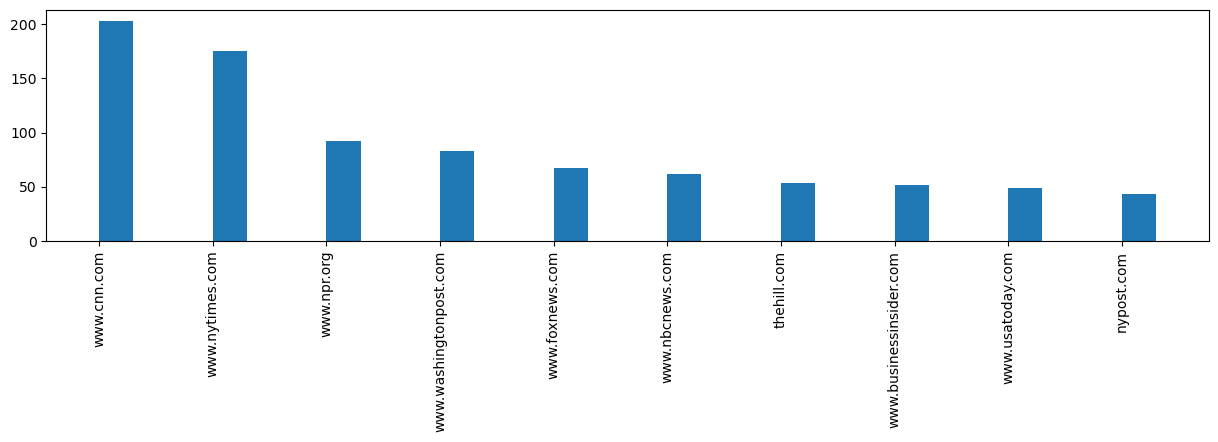

In [94]:

#plt.bar(dff.index, dff["freq"])

plt.figure(figsize=(15, 3))  # width:20, height:3
plt.xticks(rotation=90)
plt.bar(dff.index, dff["freq"], align='edge', width=0.3)

 4. heatmap that shows the distribution of domains across the 'story_position' values.

In [103]:
df["story_position"].describe()

count    2168.000000
mean        4.792897
std         2.949037
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        10.000000
Name: story_position, dtype: float64

In [100]:
data2 = {}
def domain_position(row):
    if row["domain"] not in data2.keys():
        data2[row["domain"]] = [row["story_position"]]
    else:
        data2[row["domain"]].append(row["story_position"])
    

In [101]:
df.apply(domain_position,axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
2163    None
2164    None
2165    None
2166    None
2167    None
Length: 2168, dtype: object

In [106]:
for d in data2.keys():
    print(len(data2[d]))

53
92
67
203
43
34
2
12
62
49
14
29
3
15
1
25
6
52
17
175
83
6
3
17
7
1
24
3
24
6
14
29
2
24
24
6
22
9
28
5
2
4
2
1
3
13
4
3
3
2
2
10
4
5
1
14
3
2
6
19
1
2
1
20
5
8
1
2
1
3
1
20
2
9
2
29
3
1
3
2
13
17
2
27
2
4
6
1
3
3
2
40
2
5
2
2
9
5
1
2
2
1
1
4
3
10
6
2
3
5
5
4
1
12
8
1
7
7
8
3
2
1
1
14
3
1
7
3
1
8
3
1
7
8
3
1
4
1
2
10
8
15
2
1
1
1
1
1
1
3
2
1
5
1
2
4
1
2
2
1
1
1
2
1
2
4
1
1
3
5
3
2
3
2
5
1
3
6
2
2
5
1
1
1
3
7
5
4
1
1
4
1
4
1
5
1
1
3
2
1
1
1
1
2
2
2
5
1
1
1
6
1
5
4
1
2
1
2
2
3
1
1
1
2
2
2
1
1
1
3
2
5
1
1
1
1
1
2
2
2
2
1
3
2
1
1
3
4
1
2
1
1
1
1
1
2
1
1
2
1
3
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
2
2
1
2
2
1
1
3
3
1
1
1
5
1
1
1
1
1
1
1
1
1


In [ ]:
#first until tenth positions of the story positions.


In [105]:
fig = px.imshow([ii for ii in data2.values()], 
                 color_continuous_scale=px.colors.diverging.Fall, # the color palette name
                x=[1,2,3,4,5,6,7,8,9,10],
                y=list(data2.keys()),
                labels={
                    'x':"story position",
                    'y':"domain name"
                })
fig.update_xaxes(side="top")

fig.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (312,) + inhomogeneous part.